In [1]:
import matplotlib.pyplot as plt

In [84]:
session_folder = "output\\20241201_122453"

session_folder

'output\\20241201_122453'

<Figure size 640x480 with 0 Axes>

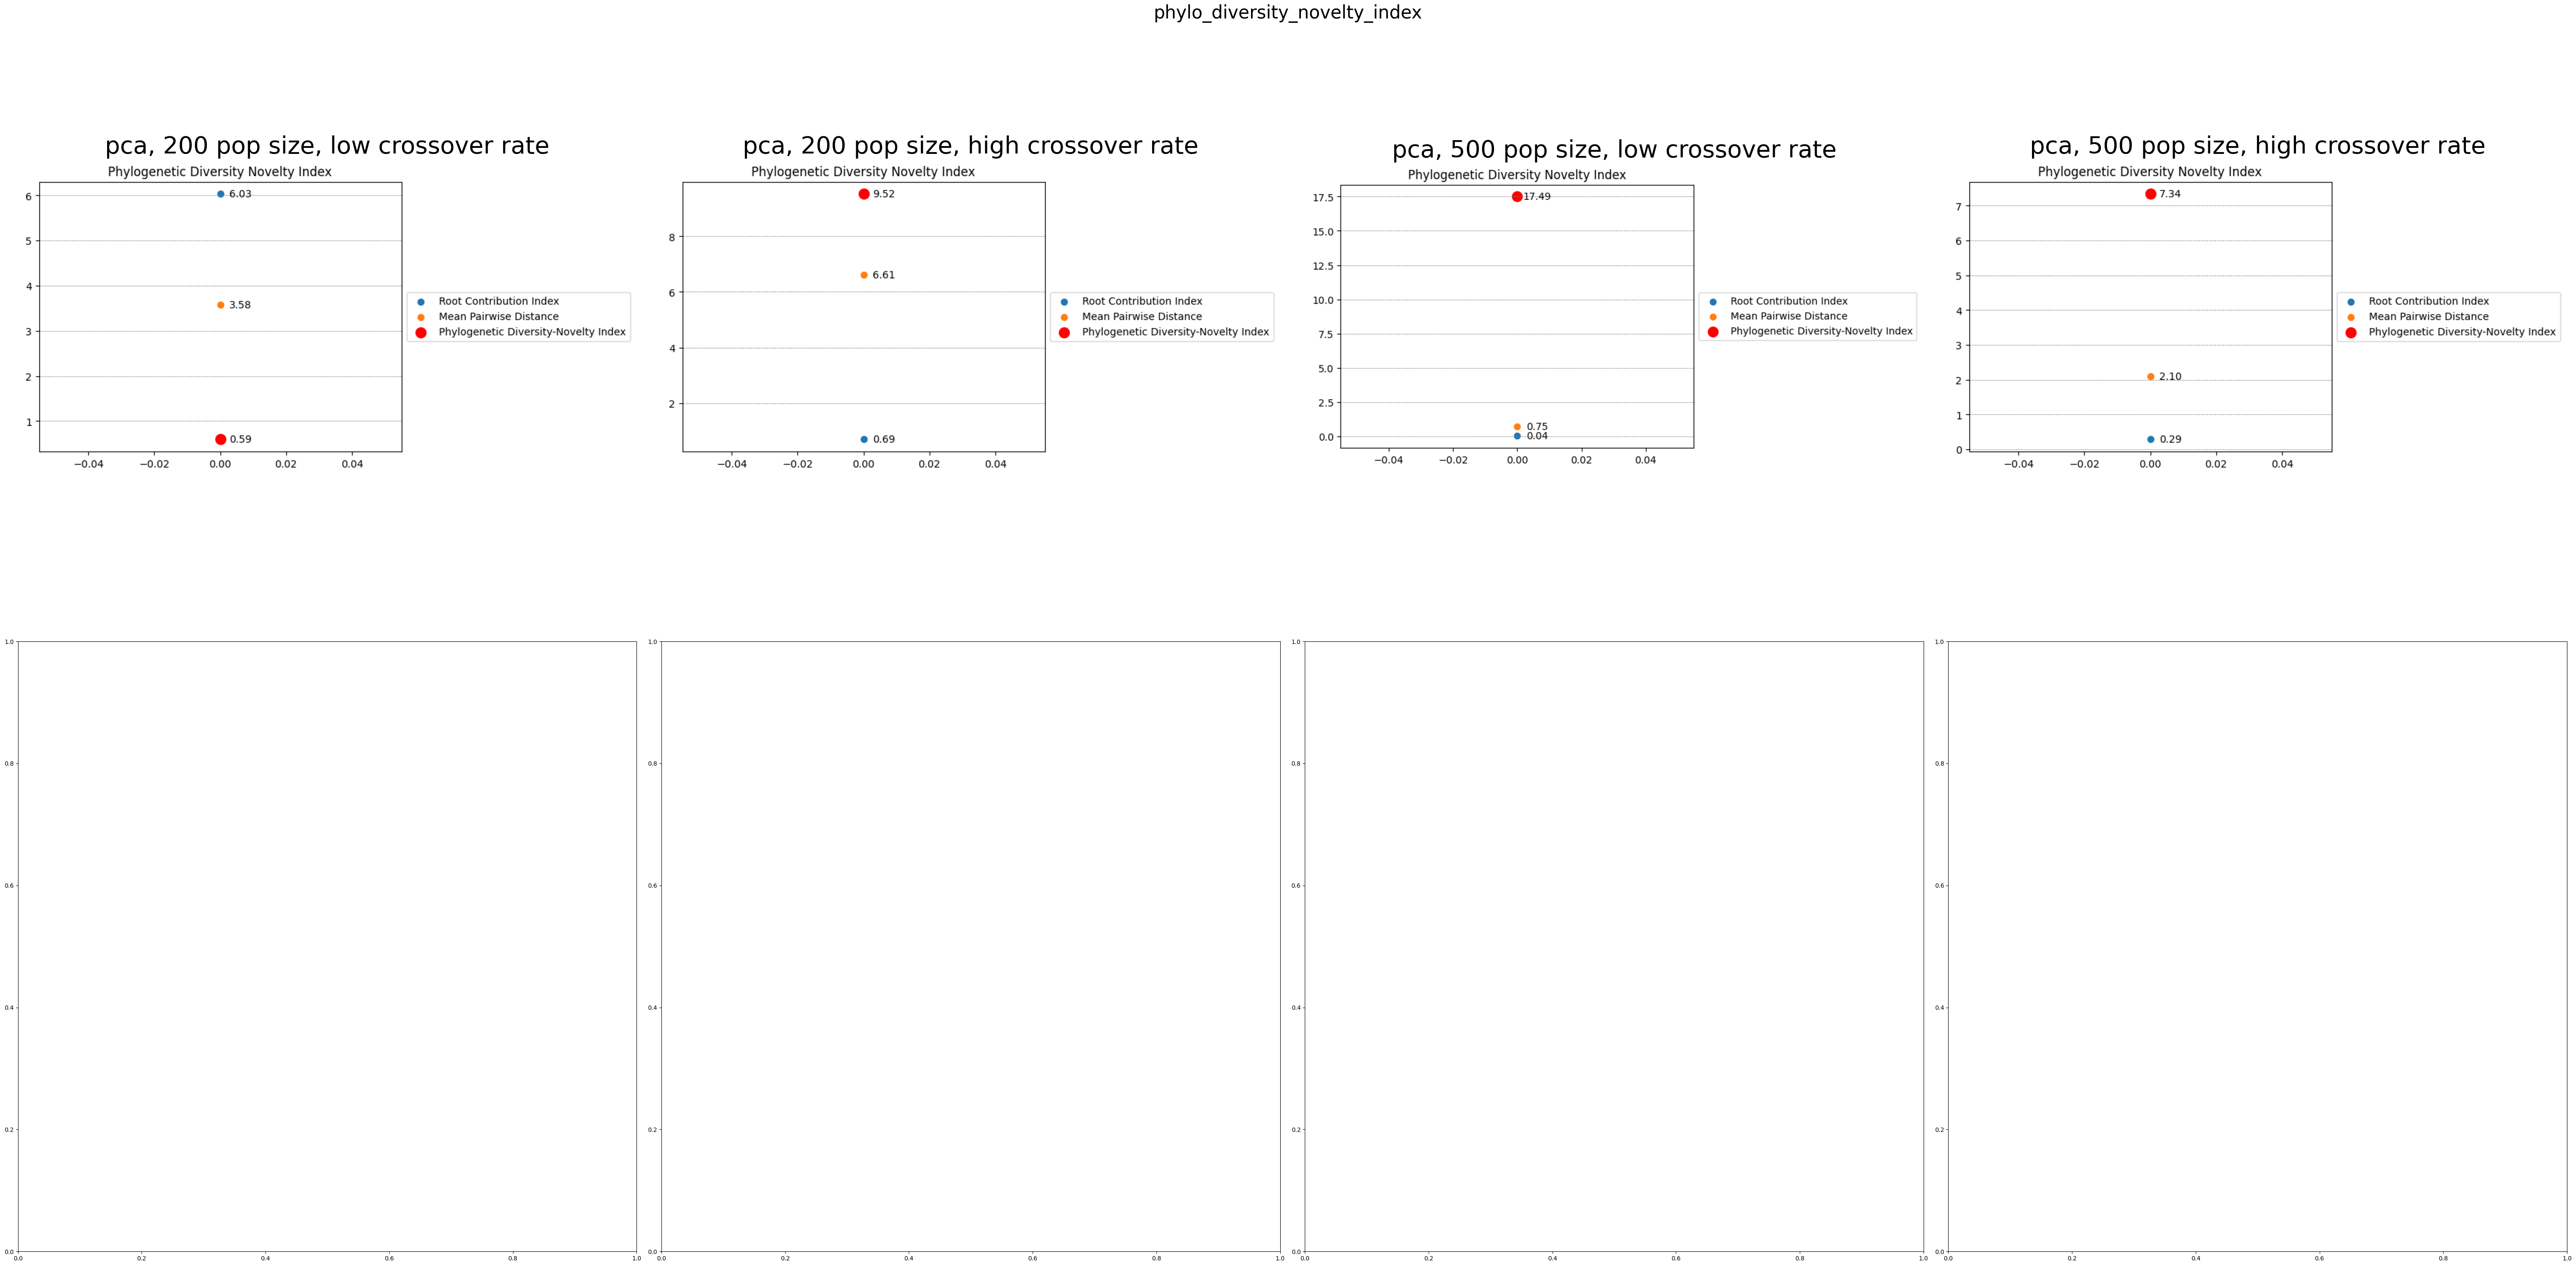

In [ ]:
# iterate the session folder and gather the plots in a grid using matplotlib

import os
import re
import json

target_plot_names = [
    "category_diversity.png",
    "functional_variance.png",
    "data_and_category_coverage.png",
    "phylo_diversity_novelty_index.png",
]
for target_plot_name in target_plot_names:
    plt.close("all")
    plt.clf()
    fig, ax = plt.subplots(2, 4, figsize=(60, 30))
    fig.suptitle(os.path.splitext(target_plot_name)[0], fontsize=30)
    fig.tight_layout()

    run_folders = [
        f for f in os.listdir(session_folder) if f.startswith("run_0")
    ]
    # for root, dirs, files in os.walk(session_folder):
    for i, run_folder in enumerate(run_folders):
        # print(root, dirs, files)
        root = os.path.join(session_folder, run_folder)
        # print(f"Processing run {root}...")
        # if os.path.basename(root).startswith("run_"):

        # read the path_001 in the folder
        # files_paths = [
        #     f for f in os.listdir(f"{root}\\path_001\\") if f.endswith(".png")
        # ]
        run_config = json.load(open(f"{root}\\path_001\\run_config.json"))
        run_note = run_config["note"]

        # create a plot for each run
        x, y = divmod(i, 4)
        # print(f"Plotting run {run_note} in position {x, y}")
        ax[x, y].set_title(run_note, fontsize=40)

        # print(files_paths)
        # for png_file in files_paths:
        # print(f"Processing plot {png_file}...")

        # extract the plot name from the file name
        plot_name = target_plot_name
        # re.search(r"(.+)_\d+.png", png_file).group(1)
        # read the image
        img = plt.imread(f"{root}\\path_001\\" + target_plot_name)
        # add the image to the plot
        ax[x, y].imshow(img)
        # ax[0, 0].set_title(plot_name)

        # no axis no frame, just image
        ax[x, y].axis("off")

        # no frame
        ax[x, y].set_frame_on(False)

    # ax[2, 2].axis("off")
    # ax[2, 2].set_frame_on(False)
    plt.savefig(f"{session_folder}\\grid_{target_plot_name}")